# Regression

Given function values
$$
\{ y_i = f(x_i), i=0,1,\ldots \}, \qquad f(x) = 2 + \sin(8 \pi x), \quad x \in [0,1]
$$
we want to find a network that gives an approximation of $f(x)$.

In [1]:
%config InlineBackend.figure_format = 'svg'
import os
from IPython.display import clear_output
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)

## Generate data

We will generate the $x_i$ randomly in $[0,1]$. Then we split this into three sets with
```
Ntrain,  Nvalid,  Ntest = Nsamples - Ntrain - Nvalid
```
number of data points.

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


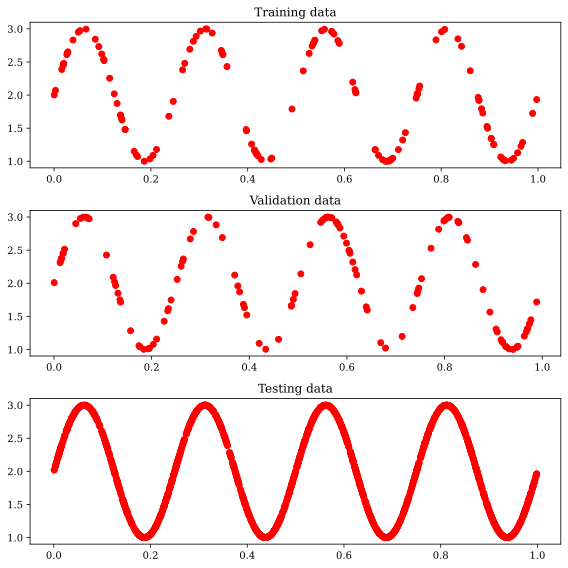

In [3]:
random_seed = 1
seed_random_number(random_seed)

# Data set:
# Dividing data into train, validation, test sets
Nsamples = 2000
Ntrain   = 128
Nvalid   = 128

x = np.random.rand(Nsamples,1)
y = 2.0 + np.sin(8*np.pi*x)

train_input = x[0:Ntrain,:]
train_truth = y[0:Ntrain,:]
valid_input = x[Ntrain:Ntrain+Nvalid,:]
valid_truth = y[Ntrain:Ntrain+Nvalid,:]
test_input = x[Ntrain+Nvalid:-1,:]
test_truth = y[Ntrain+Nvalid:-1,:]

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(train_input,train_truth,'o',color='red')
plt.title('Training data')

plt.subplot(3,1,2)
plt.plot(valid_input,valid_truth,'o',color='red')
plt.title('Validation data')

plt.subplot(3,1,3)
plt.plot(test_input,test_truth,'o',color='red')
plt.title('Testing data')

plt.show()

## Callback function

In [4]:
# Required for live plotting of errors while training
# Taken and adapted from:
# https://github.com/kapil-varshney/utilities/blob/master/training_plot/training_plot_ex_with_cifar10.ipynb
class TrainingPlot(keras.callbacks.Callback):
    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses
        self.losses = []
        self.val_losses = []
        self.logs = []
    
    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        # Append the logs, losses to the lists
        self.logs.append(logs)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        # Before plotting ensure at least 2 epochs have passed
        if epoch > 1 and epoch%500 == 0:
            # Clear the previous plot
            clear_output(wait=True)
            N = np.arange(0, len(self.losses))
            
            # Plot train loss, train acc, val loss and val acc against epochs passed
            plt.figure()
            plt.semilogy(N, self.losses, label = "train_loss")
            plt.semilogy(N, self.val_losses, label = "val_loss")
            plt.title("After epoch = {}".format(epoch))
            plt.xlabel("Epoch #")
            plt.ylabel("Loss")
            plt.legend()
            plt.show()

## Neural network

In [7]:
# Function describing network architecture
# DEMONOSTRATE ISSUE OF DYING NEURONS
# RELU Doesnt work. But Leaky ReLU does
def create_model():
  #activation = keras.layers.ReLU(max_value=None)
  #activation = keras.layers.LeakyReLU(alpha=0.01)
  activation = "tanh"

  layer1 = keras.layers.Dense(20,
                              input_shape = (1,),
                              activation=activation,
                              use_bias=True,
                              kernel_initializer='RandomNormal',
                              bias_initializer='RandomNormal')
  layer2 = keras.layers.Dense(20,
                              activation=activation,
                              use_bias=True,
                              kernel_initializer='RandomNormal',
                              bias_initializer='RandomNormal')
  layer3 = keras.layers.Dense(20,
                              activation=activation,
                              use_bias=True,
                              kernel_initializer='RandomNormal',
                              bias_initializer='RandomNormal')
  layer4 = keras.layers.Dense(20,
                              activation=activation,
                              use_bias=True,
                              kernel_initializer='RandomNormal',
                              bias_initializer='RandomNormal')
  layer5 = keras.layers.Dense(20,
                              activation=activation,
                              use_bias=True,
                              kernel_initializer='RandomNormal',
                              bias_initializer='RandomNormal')
  layer6 = keras.layers.Dense(1, 
                              use_bias=True, 
                              kernel_initializer='RandomNormal', 
                              bias_initializer='RandomNormal')
  model = keras.Sequential([layer1,layer2,layer3,layer4,layer5,layer6])
  
  model.compile(optimizer=keras.optimizers.Adam(), 
                loss='mse',
                metrics=['mse'])
  
  return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                40        
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainabl

## Train

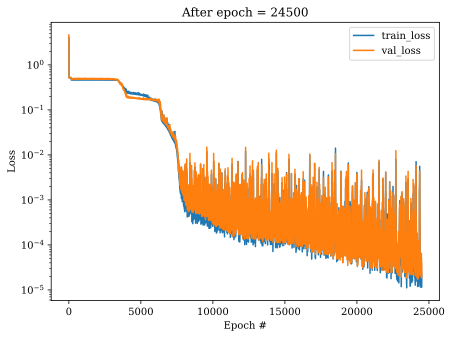

In [9]:
# Create the callback function
plot_losses = TrainingPlot()

# Training
model.fit(train_input, 
          train_truth, 
          epochs=25000, 
          verbose=0, 
          batch_size=32, 
          shuffle=True, 
          validation_data=(valid_input,valid_truth),
          callbacks=[plot_losses])

## Test the model

4/4 [==============================] - 0s 643us/step - loss: 5.0951e-05 - mse: 5.0951e-05
Train accuracy: 5.0951151933986694e-05
4/4 [==============================] - 0s 519us/step - loss: 6.4681e-05 - mse: 6.4681e-05
Validation accuracy: 6.468068022513762e-05
55/55 [==============================] - 0s 447us/step - loss: 7.0731e-05 - mse: 7.0731e-05
Test accuracy: 7.073091546772048e-05
55/55 [==============================] - 0s 347us/step


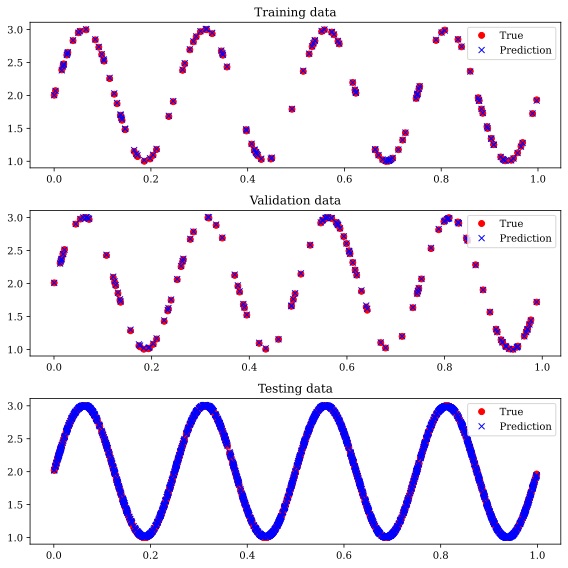

In [10]:
# Performance of trained model
train_loss, train_mse = model.evaluate(train_input, train_truth)
print('Train accuracy:', train_mse)

valid_loss, valid_mse = model.evaluate(valid_input, valid_truth)
print('Validation accuracy:', valid_mse)

test_loss, test_mse = model.evaluate(test_input, test_truth)
print('Test accuracy:', test_mse)

plt.figure(figsize=(8,8))
plt.subplot(3,1,1)
plt.plot(train_input,train_truth,'o',color='red',label='True')
plt.plot(train_input,model.predict(train_input),'x',color='blue',label='Prediction')
plt.title('Training data')
plt.legend()

plt.subplot(3,1,2)
plt.plot(valid_input,valid_truth,'o',color='red',label='True')
plt.plot(valid_input,model.predict(valid_input),'x',color='blue',label='Prediction')
plt.title('Validation data')
plt.legend()

plt.subplot(3,1,3)
plt.plot(test_input,test_truth,'o',color='red',label='True')
plt.plot(test_input,model.predict(test_input),'x',color='blue',label='Prediction')
plt.title('Testing data')
plt.legend()

plt.show()